# Sobel and Laplacian Filters

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('image10.jpg', cv2.IMREAD_GRAYSCALE)
print(image.shape)

(872, 700)


In image processing, gradients measure the change in intensity (brightness) across an image. They are crucial for detecting edges, as edges are regions where the intensity changes rapidly.

Mathematically, a gradient is a vector that points in the direction of the steepest intensity change, with its magnitude representing the rate of change.

- High gradient values: Indicate significant changes in intensity (e.g., edges, object boundaries).
- Low gradient values: Indicate uniform regions with little to no intensity change.

**Convolution** is the process of applying a filter (also called a kernel) to an image to extract specific features like edges, blur, or sharpen. Convolution is performed by sliding a kernel K over the image I, multiplying each element of the kernel with the corresponding pixel value, and summing the result.



In [ ]:
def convolve2d(image, kernel, stride=1, padding=0):

    # Zero padding to the image
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image_padded.shape

    output_height = (padded_height - kernel_height) // stride + 1
    output_width = (padded_width - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    # Convolve
    for y in range(0, output_height):
        for x in range(0, output_width):
            region = image_padded[y * stride : y * stride + kernel_height, x * stride : x * stride + kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

In [ ]:
example = np.array([[10, 20, 30], [20, 30, 40], [30, 40, 50]])
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Sobel-X filter

result = convolve2d(example, kernel, stride=1, padding=1)
print("Convolution Result:\n", result)

Convolution Result:
 [[-50. -40.  50.]
 [-90. -60.  90.]
 [-70. -40.  70.]]


## Sobel Filter (Edge Detection Using Gradients)

The Sobel filter is used to detect edges by calculating the gradient of the image intensity at each pixel.

- Sobel operator applies two kernels: one to detect horizontal edges (Sobel-X) and one to detect vertical edges (Sobel-Y).
- Each kernel is convolved with the image. The final edge magnitude is computed as square root of sum of squares of both filters.

In [ ]:
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

result_x = convolve2d(image, sobel_kernel_x, stride=1, padding=1)
result_y = convolve2d(image, sobel_kernel_y, stride=1, padding=1)

sobel_result = np.sqrt(result_x**2 + result_y**2)
print(sobel_result.shape)

(872, 700)


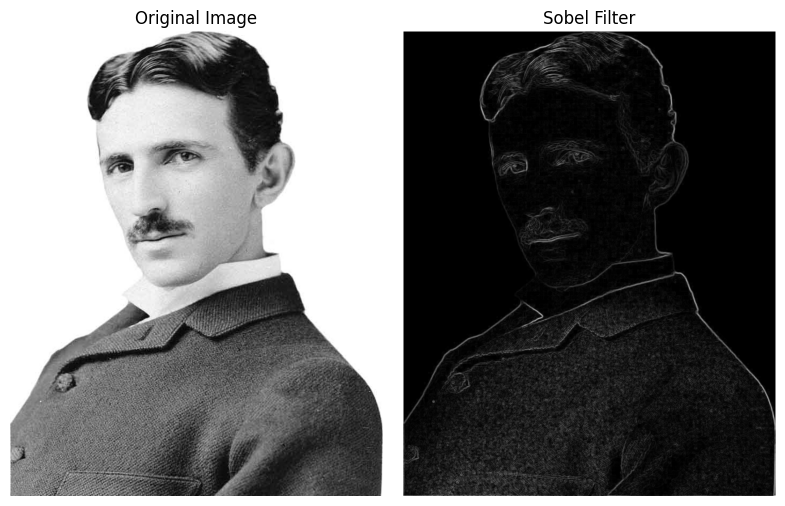

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title("Sobel Filter")
plt.axis('off')

plt.tight_layout()
plt.show()

## Laplacian Filter (Second Derivative for Edge Detection)

The Laplacian filter highlights regions of rapid intensity change, making it ideal for detecting edges. It is a second-order derivative filter. The kernel computes the difference between a pixel's intensity and the intensities of its neighbors, emphasizing areas where intensity changes rapidly.

In [ ]:
laplace_kernel = np.array([[0, 1, 0],
                           [1, -8, 1],
                           [0, 1, 0]])

result = convolve2d(image, laplace_kernel, stride=1, padding=1)

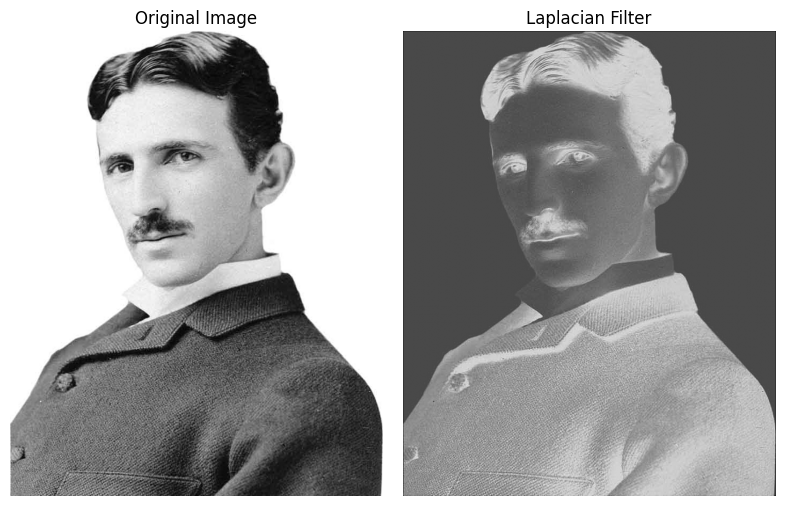

In [ ]:
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title("Laplacian Filter")
plt.axis('off')

plt.tight_layout()
plt.show()